<center>
<h4>Universidad Nacional de Córdoba - Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h4>
<h3> Análisis y Visualización de Datos </h3>
</center>


# ¿Cómo leer datos desde pandas?

En esta primera notebook, aprendemos cómo cargar un conjunto de datos utilizando pandas y cómo ver su contenido.



In [1]:
import io
import pandas
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import numpy
import scipy.stats
print(seaborn.__version__)

0.11.2


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset AyVD 2022 (respuestas) - Respuestas de formulario 1.csv to Dataset AyVD 2022 (respuestas) - Respuestas de formulario 1.csv


Una vez subido el archivo, éste está disponible en la variable `uploaded`, que es un diccionario. Casi siempre, la clave que estamos buscando es el nombre del archivo que acabamos de subir, pero podría no ser el caso. Para estar seguro, vamos a listar los archivos que se subieron.

> Bloc con sangría



In [3]:
print(uploaded.keys())

dict_keys(['Dataset AyVD 2022 (respuestas) - Respuestas de formulario 1.csv'])


Una vez que tenemos la clave correspondiente, obtenemos el contenido del archivo. En los siguientes comandos hay algunos conceptos avanzados de python, así que no se preocupen si nos los entienden del todo.

In [4]:
file_key = 'Dataset AyVD 2022 (respuestas) - Respuestas de formulario 1.csv'
df = pandas.read_csv(io.StringIO(uploaded[file_key].decode('utf-8')))

Con esta operación, hemos creado un DataFrame de pandas en base al archivo de respuestas. Un DataFrame no es más que una tabla sobre la cual podemos aplicar un montón de operaciones similares a las de Excel o a las SQL. En esta notebook no pretendemos hacer un tutorial de pandas, el Internet está lleno de ellos, pero sí iremos explicando cómo implementar determinadas operaciones necesarias para el análisis de este conjunto de datos.

Veamos qué tiene adentro el DataFrame `df`.

In [5]:
df

,Marca temporal,Nombre o Alias,Género,Edad,"Adivinar la estatura de Valeria Rulloni (en centímetros, ejemplo: 180=1.80 metro . No poner comas solo un numero entero)"
0,8/04/2022 19:59:56,Diego Flores,Hombre,33,167
1,8/04/2022 19:59:58,Pilar Avila,Mujer,35,164
2,8/04/2022 20:00:04,Luis Yurovich,Hombre,28,173
3,8/04/2022 20:00:06,Luciano Monforte,Hombre,38,160
4,8/04/2022 20:00:09,Nati T,Mujer,33,165
...,...,...,...,...,...
126,8/04/2022 21:24:52,Marcos,Hombre,30,168
127,8/04/2022 21:25:48,Franco Genolet,Hombre,24,165
128,8/04/2022 21:33:40,Emy,Hombre,40,164
129,8/04/2022 22:04:24,Gonzalo,Hombre,37,165


## Variables y columnas

Para trabajar más cómodamente, renombraremos las columnas de DataFrame. Tengan cuidado de que el orden de los nombres nuevos se corresponda con el contenido de cada columna.

In [6]:
df.columns = ['hora', 'nombre', 'genero', 'edad', 'adivino_altura']

In [7]:
df

,hora,nombre,genero,edad,adivino_altura
0,8/04/2022 19:59:56,Diego Flores,Hombre,33,167
1,8/04/2022 19:59:58,Pilar Avila,Mujer,35,164
2,8/04/2022 20:00:04,Luis Yurovich,Hombre,28,173
3,8/04/2022 20:00:06,Luciano Monforte,Hombre,38,160
4,8/04/2022 20:00:09,Nati T,Mujer,33,165
...,...,...,...,...,...
126,8/04/2022 21:24:52,Marcos,Hombre,30,168
127,8/04/2022 21:25:48,Franco Genolet,Hombre,24,165
128,8/04/2022 21:33:40,Emy,Hombre,40,164
129,8/04/2022 22:04:24,Gonzalo,Hombre,37,165


In [70]:
df.genero.value_counts()

Hombre    80
Mujer     51
Name: genero, dtype: int64

In [73]:
df[df.genero == 'Hombre']['adivino_altura'].mean()

166.475

In [74]:
df[df.genero == 'Mujer']['adivino_altura'].mean()

166.2156862745098

Como podemos ver las "adivinaciones"?

In [8]:
Nencuesta = df['adivino_altura'].count() #cantidad de datos
print(Nencuesta)
print(df['adivino_altura'].dtype )

131
int64



# Estimación e intervalo de confianza

Calculamos la Media de una muestra de "adivinaciones" de la altura

In [30]:
#df.adivino_altura.describe().apply(lambda s: '{0:.2f}'.format(s))

# Calcular el estadístico media muestral: estimación de la altura
estadistico_media_altura= df['adivino_altura'].mean()
estadistico_media_altura

166.3740458015267

Estimación puntual: Desviación estándar

In [62]:
estadistico_desv_altura = df['adivino_altura'].std()
estadistico_desv_altura

5.123604317068805

Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.

In [32]:
alpha = 0.05

Intervalo de confianza para la media de nivel 0.95, utilizamos el score Z (alpha/2)=1.96

percentil (1-alpha/2) (o (1-alpha/2)*100%) de una Normal Estandar

---

In [33]:
z_0975 = 1.96

Límite inferior del intervalo de confianza para la media de la estatura

In [34]:
estadistico_media_altura_liminf = estadistico_media_altura - z_0975 * (estadistico_desv_altura / Nencuesta)
estadistico_media_altura_liminf

166.29738729418736

 Límite superior del intervalo de confianza para la media de la estatura


In [35]:
estadistico_media_altura_limsup = estadistico_media_altura + z_0975 * (estadistico_desv_altura / Nencuesta)
estadistico_media_altura_limsup

166.45070430886605

Calcule la longitud del intervalo

In [36]:
longitud_invervalo = estadistico_media_altura_limsup - estadistico_media_altura_liminf
longitud_invervalo

0.15331701467869152

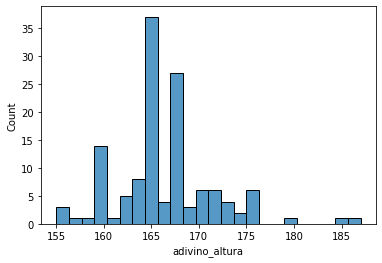

In [51]:
seaborn.histplot(df['adivino_altura'])

# Tomar una muestra de los datos y volver a calcular la estimación y los intervalos de confianza

In [53]:
n = 25
muestra=df['adivino_altura'].sample(n, replace=False) # muestra de tamaño n

In [54]:
m=muestra.mean()
m

165.96

In [55]:
muestra

79     165
101    175
105    167
110    164
57     160
41     173
66     165
64     165
113    170
39     168
96     158
38     172
27     163
123    162
43     170
10     165
59     159
111    160
20     160
40     167
6      168
73     165
121    168
50     170
49     170
Name: adivino_altura, dtype: int64

In [57]:
alpha = 0.05

In [58]:
z_0975 = 1.96

In [63]:
estadistico_media_altura_liminf = m - z_0975 * (estadistico_desv_altura / n)
estadistico_media_altura_liminf

165.55830942154182

In [64]:
estadistico_media_altura_limsup = m + z_0975 * (estadistico_desv_altura / n)
estadistico_media_altura_limsup

166.3616905784582

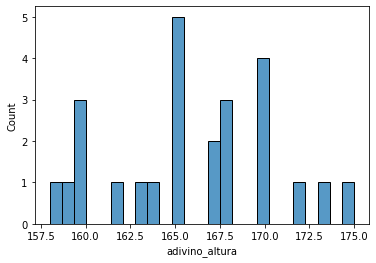

In [66]:
seaborn.histplot(muestra, bins = 25)

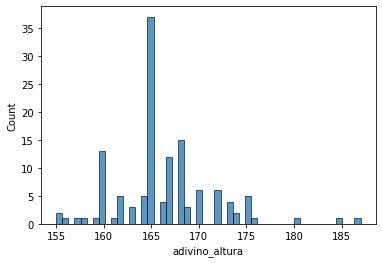

In [69]:
seaborn.histplot(df.adivino_altura, bins = 50)